# Notebook for Part 2 - Decision Trees

In [17]:
# imports

import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# decision tree
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

Loading the train and test data sets

In [18]:
df_train = pd.read_csv("../heart_disease_data/train_dataset.csv")
df_test = pd.read_csv("../heart_disease_data/test-dataset-oh.csv")

columns = df_train.columns
df_train_feature = df_train[columns[:-1]]
df_train_target = df_train["num"]
df_test_feature = df_test[columns[:-1]]
df_test_target = df_test["num"]

## 2.a) Question: Base line approach of allways predicting the mode.

In [19]:
'''create a baseline classifier that will always guess the most probable target'''

d_classifier = DummyClassifier()

d_fit = d_classifier.fit(df_train_feature,df_train_target)
score = d_classifier.score(df_test_feature,df_test_target)
print(score)


0.34782608695652173


## 2.b) Creating a decision tree

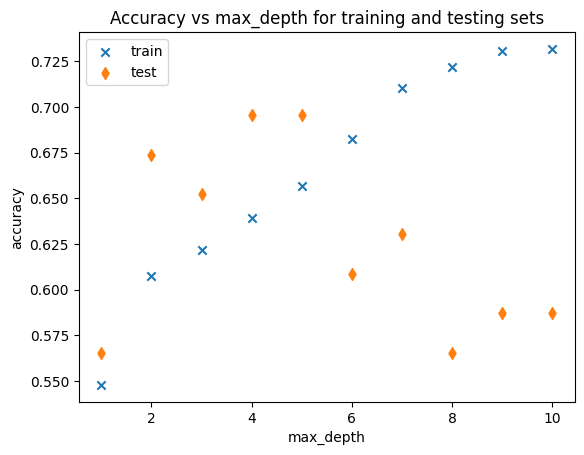

the prefered max depth for the Decision tree is 5 as it maximizes the accuracy of for the test dataset. 
 the highest achieved accuaracy is 69.565217%


In [42]:

accuracy_test = []
accuracy_train = []
for i in range(1,11):
    t = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6, random_state=42, max_depth=i)

    t_fit = t.fit(df_train_feature,df_train_target)
    t_score_train = t.score(df_train_feature,df_train_target)
    t_score_test = t.score(df_test_feature,df_test_target)
    accuracy_test.append(t_score_test)
    accuracy_train.append(t_score_train)
x = np.linspace(1,10,10)

fig, ax = plt.subplots()
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs max_depth for training and testing sets")
ax.scatter(x, accuracy_train, marker="x", label="train")
ax.scatter(x, accuracy_test, marker="d", label="test")

ax.legend()
plt.show()
print("the prefered max depth for the Decision tree is 5 as it maximizes the accuracy of for the test dataset. \n the highest achieved accuaracy is %f%%" % (100*accuracy_test[4]))


## 2.c) Question: Draw a decision tree

[Text(0.4090909090909091, 0.875, 'x[7] <= 0.5\nentropy = 2.021\nsamples = 100.0%\nvalue = [0.348, 0.37, 0.109, 0.087, 0.087]'),
 Text(0.18181818181818182, 0.625, 'x[0] <= 58.5\nentropy = 0.978\nsamples = 37.0%\nvalue = [0.765, 0.0, 0.059, 0.176, 0.0]'),
 Text(0.29545454545454547, 0.75, 'True  '),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 19.6%\nvalue = [1.0, 0.0, 0.0, 0.0, 0.0]'),
 Text(0.2727272727272727, 0.375, 'entropy = 1.406\nsamples = 17.4%\nvalue = [0.5, 0.0, 0.125, 0.375, 0.0]'),
 Text(0.6363636363636364, 0.625, 'x[3] <= 123.045\nentropy = 1.746\nsamples = 63.0%\nvalue = [0.103, 0.586, 0.138, 0.034, 0.138]'),
 Text(0.5227272727272727, 0.75, '  False'),
 Text(0.45454545454545453, 0.375, 'x[1] <= 129.0\nentropy = 0.7\nsamples = 32.6%\nvalue = [0.0, 0.867, 0.0, 0.067, 0.067]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.65\nsamples = 13.0%\nvalue = [0.0, 0.833, 0.0, 0.0, 0.167]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.503\nsamples = 19.6%\nvalue = [0.

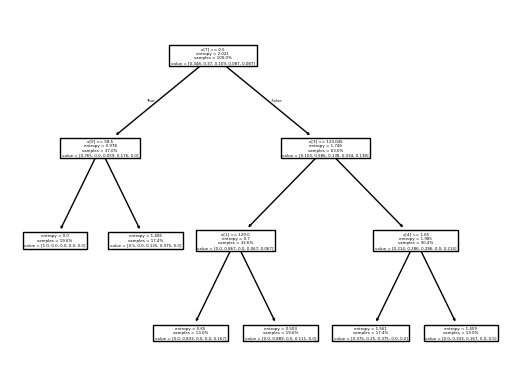

In [48]:
tclfr = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6, random_state=42, max_depth=3)
fit = tclfr.fit(df_test_feature,df_test_target)
plot_tree(tclfr,proportion=True)
